In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install yahoo_fin
!pip install requests_html

In [6]:
from yahoo_fin.stock_info import get_data


df= get_data('^DJI',  start_date = '2016-01-14',
                      end_date='2017-01-30',
                      #index_as_date = True, 
                      interval="1d")
df

,open,high,low,close,adjclose,volume,ticker
2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000,^DJI
2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000,^DJI
2016-01-19,16009.450195,16171.959961,15900.250000,16016.019531,16016.019531,144360000,^DJI
2016-01-20,15989.450195,15989.450195,15450.559570,15766.740234,15766.740234,191870000,^DJI
2016-01-21,15768.870117,16038.589844,15704.660156,15882.679688,15882.679688,145140000,^DJI
...,...,...,...,...,...,...,...
2017-01-23,19794.789062,19833.980469,19732.359375,19799.849609,19799.849609,326690000,^DJI
2017-01-24,19794.679688,19949.240234,19786.710938,19912.710938,19912.710938,374460000,^DJI
2017-01-25,19994.480469,20082.000000,19994.480469,20068.509766,20068.509766,372240000,^DJI
2017-01-26,20076.250000,20125.580078,20067.529297,20100.910156,20100.910156,356730000,^DJI


In [ ]:
#df = pd.read_csv(r'\Data\Dow_Jones_Industrial_Average.csv', parse_dates= True)

In [ ]:
#df = df[(df['Date'] > '2016-01-14') & (df['Date'] <= '2017-01-30')]

In [ ]:
#df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000
2,2016-01-19,16009.450195,16171.959961,15900.250000,16016.019531,16016.019531,144360000
3,2016-01-20,15989.450195,15989.450195,15450.559570,15766.740234,15766.740234,191870000
4,2016-01-21,15768.870117,16038.589844,15704.660156,15882.679688,15882.679688,145140000
5,2016-01-22,15921.099609,16136.790039,15921.099609,16093.509766,16093.509766,145850000
6,2016-01-25,16086.459961,16086.459961,15880.150391,15885.219727,15885.219727,123250000
7,2016-01-26,15893.160156,16185.790039,15893.160156,16167.230469,16167.230469,118210000
8,2016-01-27,16168.740234,16235.030273,15878.299805,15944.459961,15944.459961,138350000
9,2016-01-28,15960.280273,16102.139648,15863.719727,16069.639648,16069.639648,130120000
10,2016-01-29,16090.259766,16466.300781,16090.259766,16466.300781,16466.300781,217940000


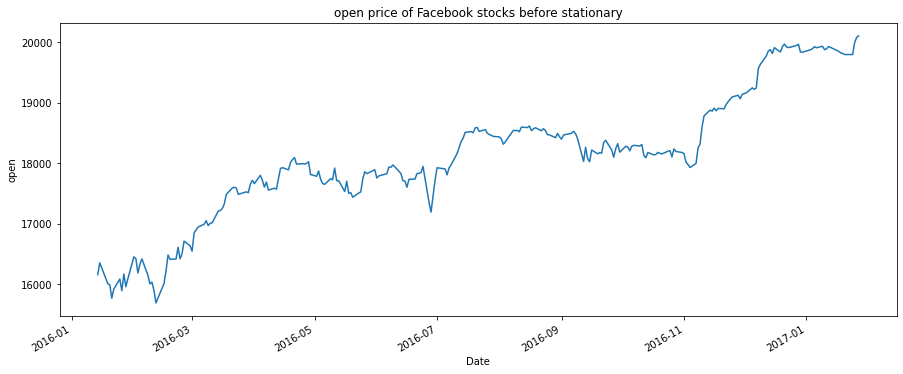

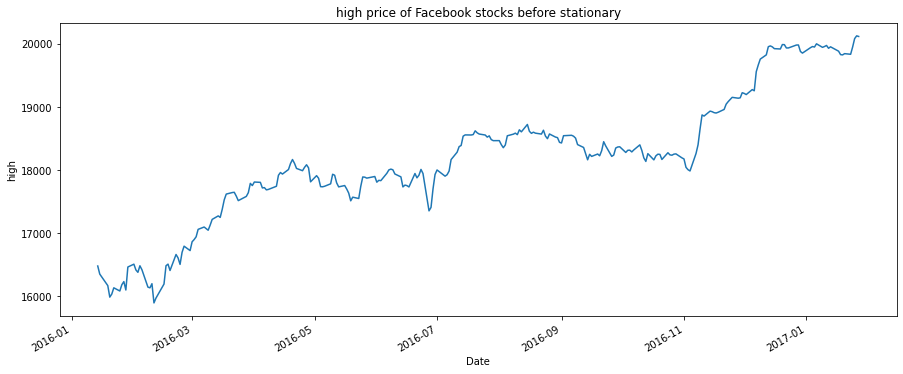

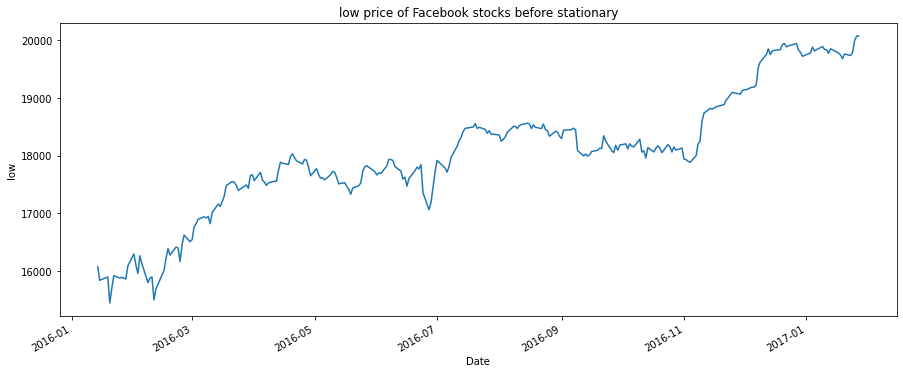

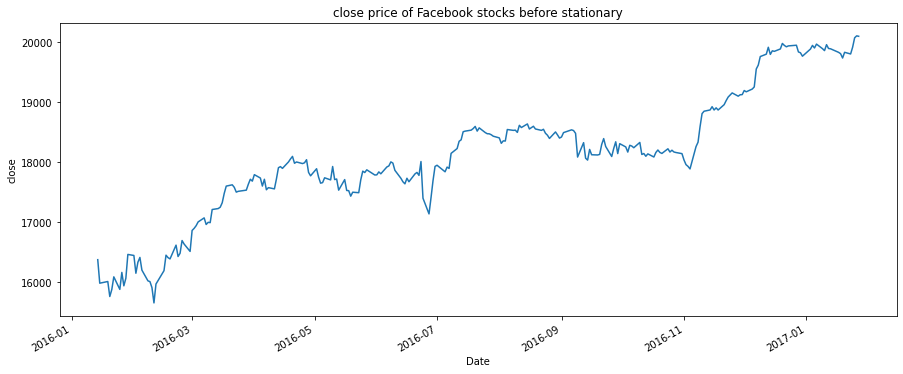

In [9]:
for c in df[['open', 'high', 'low', 'close']]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks before stationary")
    plt.show()

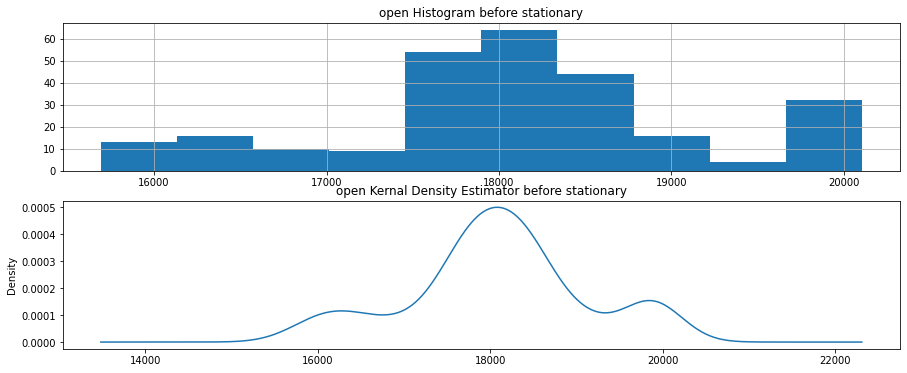

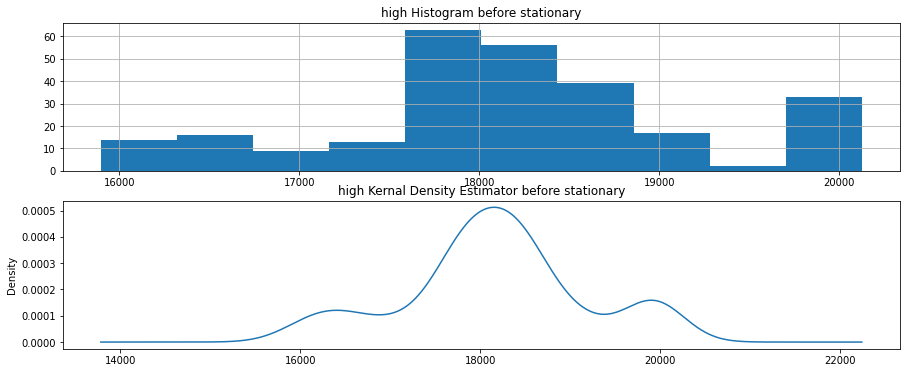

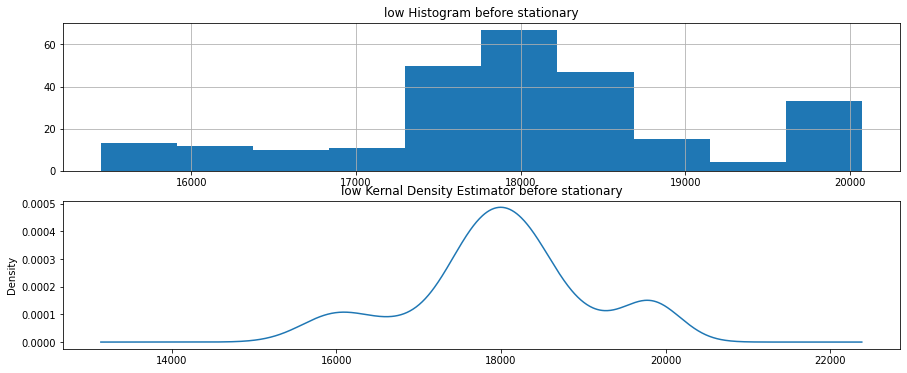

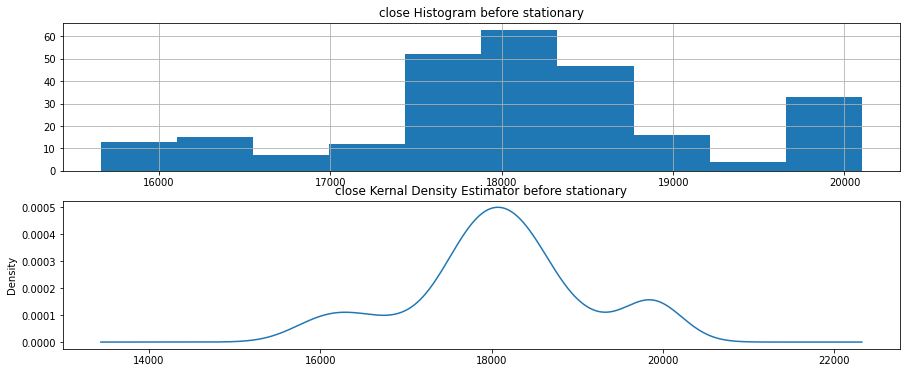

In [10]:
for c in df[['open', 'high', 'low', 'close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

In [11]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return 

In [12]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [13]:
for name, column in df[['open', 'high', 'low', 'close']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: open
Test Statistic                  -0.861063
p-value                          0.800525
No Lags Used                     0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: high
Test Statistic                  -0.892227
p-value                          0.790521
No Lags Used                     2.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: low
Test Statistic                  -1.105469
p-value                          0.712886
No L

In [16]:
X = df[['open', 'high', 'low', 'close']]
train, test = X[0:-30], X[-30:]
print(train.shape)
print(test.shape)

(232, 4)
(30, 4)


In [17]:
train_diff = train.diff()
train_diff.dropna(inplace = True)
print(train_diff.shape)

(231, 4)


In [18]:
for name, column in train_diff[['open', 'high', 'low', 'close']].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: open
Test Statistic                -1.584985e+01
p-value                        9.476929e-29
No Lags Used                   0.000000e+00
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: high
Test Statistic                -1.145578e+01
p-value                        5.711510e-21
No Lags Used                   1.000000e+00
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: low
Test Statistic                  -3.958512
p-value                          0.001644


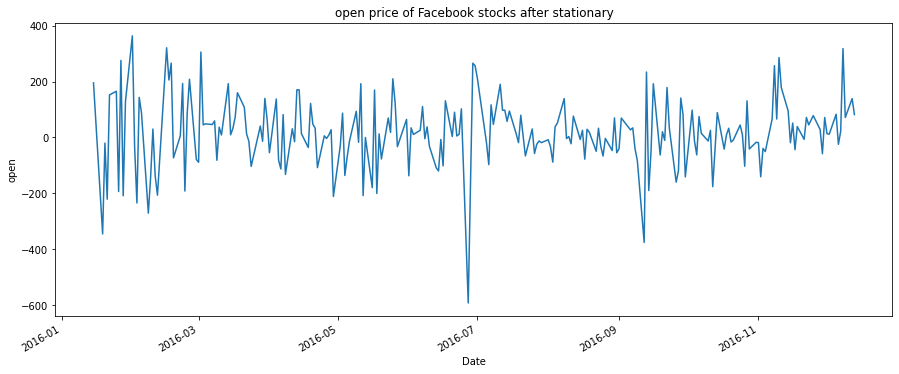

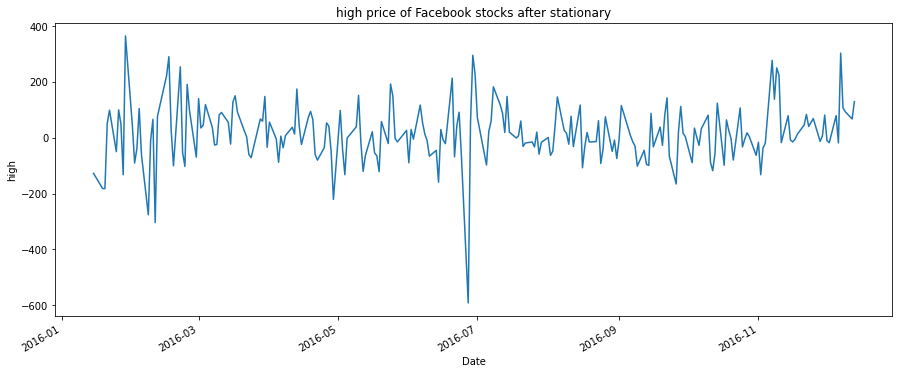

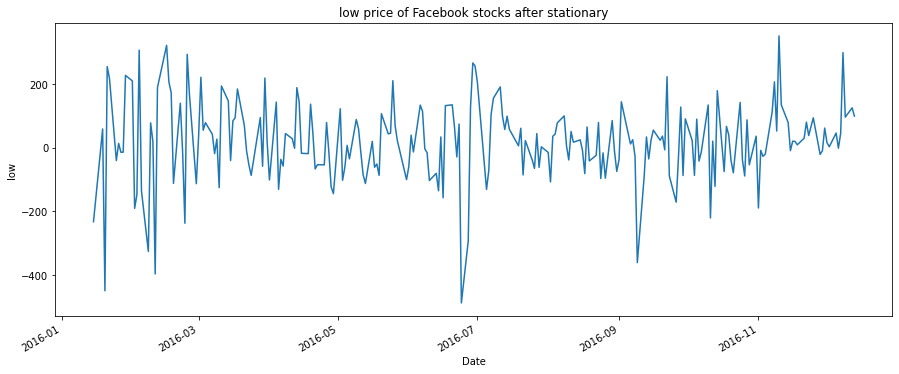

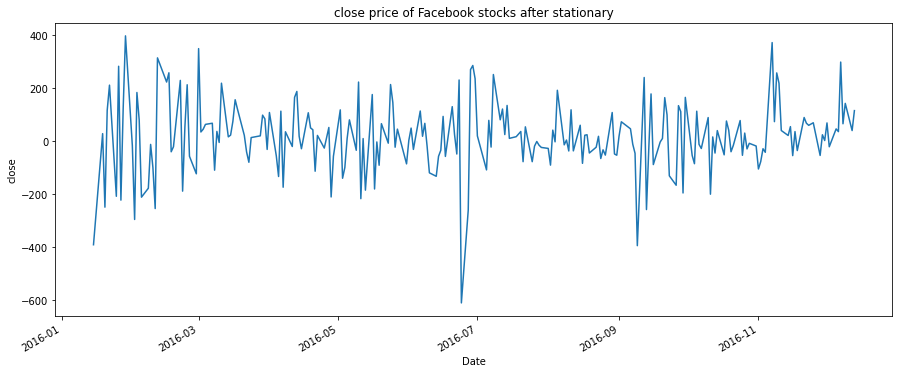

In [19]:
for c in train_diff[['open', 'high', 'low', 'close']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks after stationary")
    plt.show()

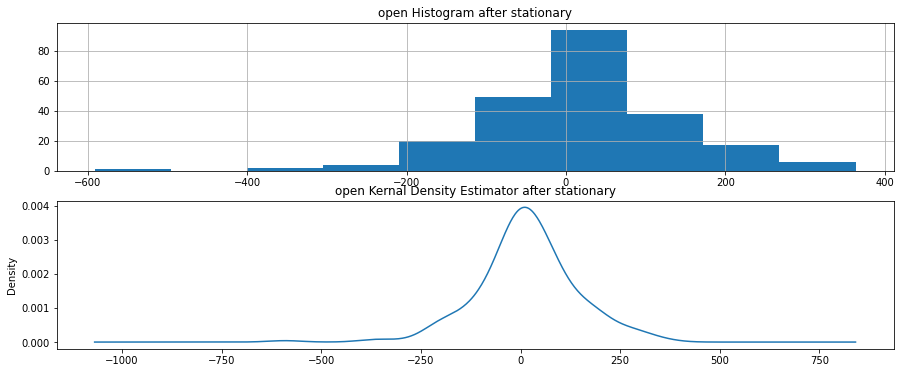

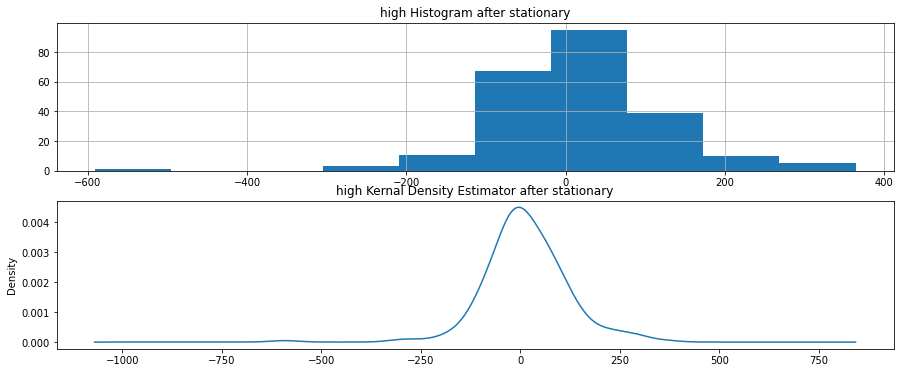

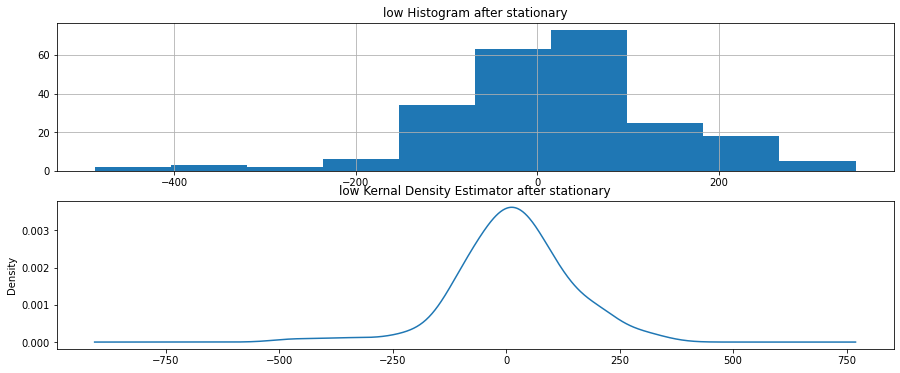

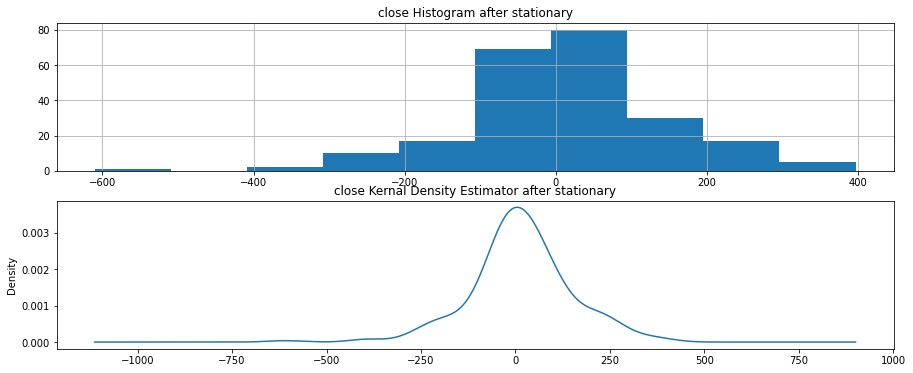

In [20]:
for c in train_diff[['open', 'high', 'low', 'close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [21]:
train_diff.head(10)

,open,high,low,close
2016-01-15,195.320312,-127.720703,-233.009766,-390.969727
2016-01-19,-344.879883,-182.370117,58.139648,27.939453
2016-01-20,-20.000000,-182.509766,-449.690430,-249.279297
2016-01-21,-220.580078,49.139648,254.100586,115.939453
2016-01-22,152.229492,98.200195,216.439453,210.830078
2016-01-25,165.360352,-50.330078,-40.949219,-208.290039
2016-01-26,-193.299805,99.330078,13.009766,282.010742
2016-01-27,275.580078,49.240234,-14.860352,-222.770508
2016-01-28,-208.459961,-132.890625,-14.580078,125.179688
2016-01-29,129.979492,364.161133,226.540039,396.661133


In [22]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [23]:
cointegration_test(train_diff[['open', 'high', 'low', 'close']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
open   >  314.71    > 40.1749   =>   True
high   >  203.91    > 24.2761   =>   True
low    >  107.69    > 12.3212   =>   True
close  >  31.19     > 4.1296    =>   True


In [24]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

Order : 1, AIC:  32.33798378401238, BIC: 32.63694720217962
Order : 2, AIC:  31.863159560496026, BIC: 32.40295865275783
Order : 3, AIC:  31.59127971736392, BIC: 32.37341117659915
Order : 4, AIC:  31.54679815745426, BIC: 32.57277437414472
Order : 5, AIC:  31.53024223549366, BIC: 32.80159152725858
Order : 6, AIC:  31.543777800874, BIC: 33.06204464629819
Order : 7, AIC:  31.56816916244275, BIC: 33.334914439296256
Order : 8, AIC:  31.621616005029043, BIC: 33.638417232978526
Order : 9, AIC:  31.659099851917173, BIC: 33.92755143983203


In [25]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [26]:
results = model.fit(4)
display(results.summary())
z = results.forecast(y=train_diff[['open', 'high', 'low', 'close' ]].values, steps=30)
df_pred = pd.DataFrame(z, columns=['open', 'high', 'low', 'close' ])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 06, Sep, 2020
Time:                     13:29:53
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    32.5728
Nobs:                     227.000    HQIC:                   31.9608
Log likelihood:          -4800.96    FPE:                5.02445e+13
AIC:                      31.5468    Det(Omega_mle):     3.76385e+13
--------------------------------------------------------------------
Results for equation open
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            3.332506         1.999013            1.667           0.095
L1.open         -0.676185         0.099987           -6.763           0.000
L1.high         -0.087763         0.048215           -1.820           0.069
L1.lo

In [27]:
df_pred["new_index"] = range(233, 263)
df_pred = df_pred.set_index("new_index")

In [29]:
res = inverse_diff(df[['open', 'high', 'low', 'close']],df_pred)

In [30]:
res

,open,high,low,close,open_1st_inv_diff,high_1st_inv_diff,low_1st_inv_diff,close_1st_inv_diff
new_index,,,,,,,,
233,65.893403,-1.462880,-16.343208,-32.018257,20169.252778,20114.507823,20056.297417,20061.761040
234,-26.590946,-4.668424,-2.825990,22.089541,20142.661832,20109.839399,20053.471427,20083.850581
235,28.005438,14.950466,28.437339,2.729042,20170.667270,20124.789865,20081.908766,20086.579623
236,3.492143,10.143712,-4.467697,5.912757,20174.159413,20134.933577,20077.441068,20092.492380
237,4.804209,16.369463,22.713386,28.585120,20178.963622,20151.303040,20100.154455,20121.077499
238,29.391897,20.885845,26.545888,19.872196,20208.355520,20172.188885,20126.700343,20140.949695
239,19.650670,16.244895,14.753941,12.948787,20228.006190,20188.433780,20141.454285,20153.898483
240,13.403265,18.649264,19.907320,23.596389,20241.409454,20207.083044,20161.361605,20177.494872
241,22.795144,18.093789,19.715831,15.114126,20264.204598,20225.176834,20181.077436,20192.608998


In [31]:
for i in ['open', 'high', 'low', 'close' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for open
MSE is : 255718.80539976785
MAE is : 480.60687233603346
RMSE is : 505.68646946479384
MAPE is : 2.416564172545086
R2 is : -44.87896730661844

Evaluation metric for high
MSE is : 175389.7965195783
MAE is : 388.91618260076626
RMSE is : 418.79565007241695
MAPE is : 1.9509318835645268
R2 is : -31.74706975086854

Evaluation metric for low
MSE is : 239271.8444263433
MAE is : 457.39509670835565
RMSE is : 489.15421333802624
MAPE is : 2.3072659076655837
R2 is : -26.167912725632387

Evaluation metric for close
MSE is : 193541.9612461896
MAE is : 411.9374812943087
RMSE is : 439.93404192695704
MAPE is : 2.0717929179119596
R2 is : -23.94154823078701



In [35]:
train

,open,high,low,close
2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805
2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078
2016-01-19,16009.450195,16171.959961,15900.250000,16016.019531
2016-01-20,15989.450195,15989.450195,15450.559570,15766.740234
2016-01-21,15768.870117,16038.589844,15704.660156,15882.679688
...,...,...,...,...
2016-12-07,19241.990234,19558.419922,19229.830078,19549.619141
2016-12-08,19559.939453,19664.970703,19527.830078,19614.810547
2016-12-09,19631.349609,19757.740234,19623.189453,19756.849609
2016-12-12,19770.199219,19824.589844,19747.740234,19796.429688


In [44]:
test

,open,high,low,close
2016-12-14,19876.130859,19966.429688,19748.669922,19792.529297
2016-12-15,19811.500000,19951.289062,19811.500000,19852.240234
2016-12-16,19909.009766,19923.169922,19821.000000,19843.410156
2016-12-19,19836.660156,19917.779297,19832.949219,19883.060547
2016-12-20,19920.589844,19987.630859,19920.419922,19974.619141
2016-12-21,19968.970703,19986.560547,19941.960938,19941.960938
2016-12-22,19922.679688,19933.830078,19882.189453,19918.880859
2016-12-23,19908.609375,19934.150391,19899.060547,19933.810547
2016-12-27,19943.460938,19980.240234,19939.800781,19945.039062
2016-12-28,19964.310547,19981.109375,19827.310547,19833.679688


In [41]:
res.index=test.index

In [43]:
res

,open,high,low,close,open_1st_inv_diff,high_1st_inv_diff,low_1st_inv_diff,close_1st_inv_diff
2016-12-14,65.893403,-1.462880,-16.343208,-32.018257,20169.252778,20114.507823,20056.297417,20061.761040
2016-12-15,-26.590946,-4.668424,-2.825990,22.089541,20142.661832,20109.839399,20053.471427,20083.850581
2016-12-16,28.005438,14.950466,28.437339,2.729042,20170.667270,20124.789865,20081.908766,20086.579623
2016-12-19,3.492143,10.143712,-4.467697,5.912757,20174.159413,20134.933577,20077.441068,20092.492380
2016-12-20,4.804209,16.369463,22.713386,28.585120,20178.963622,20151.303040,20100.154455,20121.077499
2016-12-21,29.391897,20.885845,26.545888,19.872196,20208.355520,20172.188885,20126.700343,20140.949695
2016-12-22,19.650670,16.244895,14.753941,12.948787,20228.006190,20188.433780,20141.454285,20153.898483
2016-12-23,13.403265,18.649264,19.907320,23.596389,20241.409454,20207.083044,20161.361605,20177.494872
2016-12-27,22.795144,18.093789,19.715831,15.114126,20264.204598,20225.176834,20181.077436,20192.608998
2016-12-28,15.352830,15.080906,15.758476,15.931471,20279.557428,20240.257740,20196.835912,20208.540469


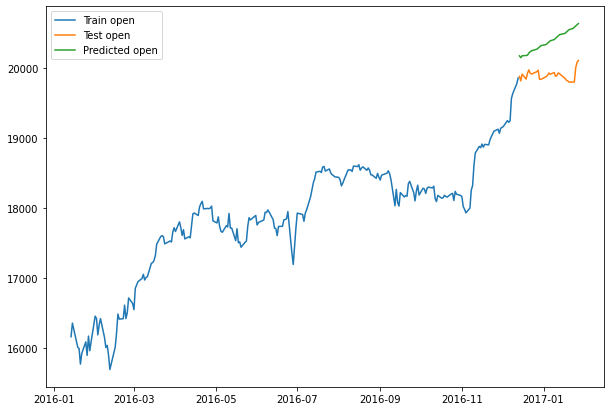

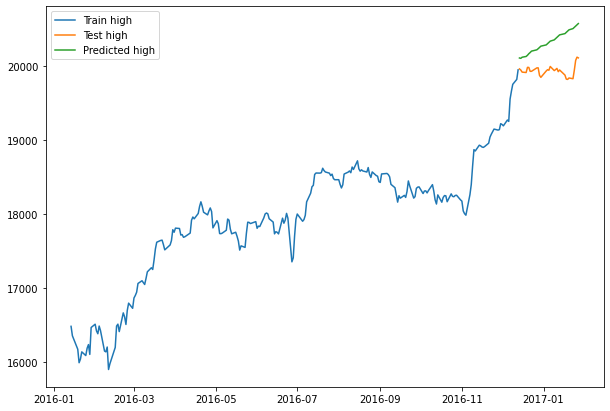

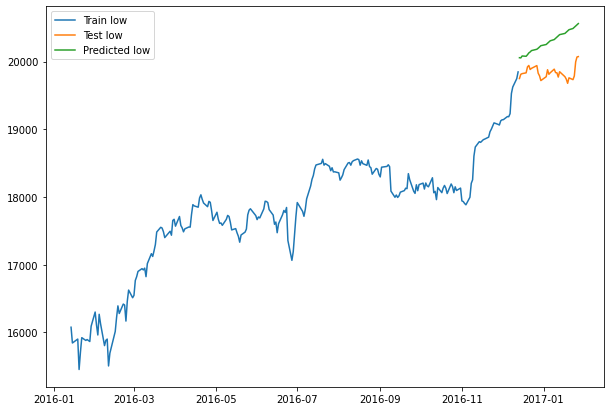

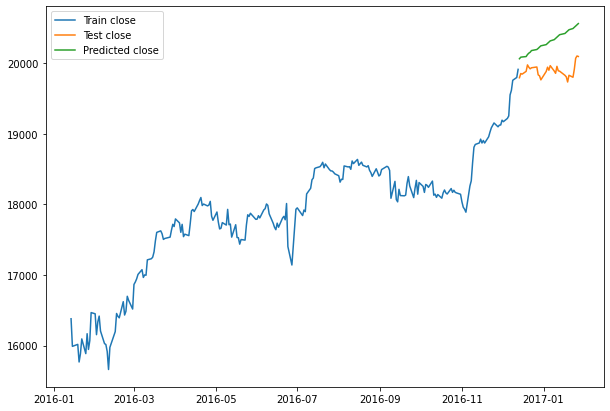

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['open', 'high', 'low', 'close']:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()